### 2. Tipos de Gráficos

`Plots` soporta diversos tipos de gráficos que son útiles en el análisis de sistemas de potencia.

#### **Gráficos de Líneas**

Ideales para mostrar tendencias, como la variación de potencia a lo largo del tiempo como en flujos de potencia cuasi-dinámicos.

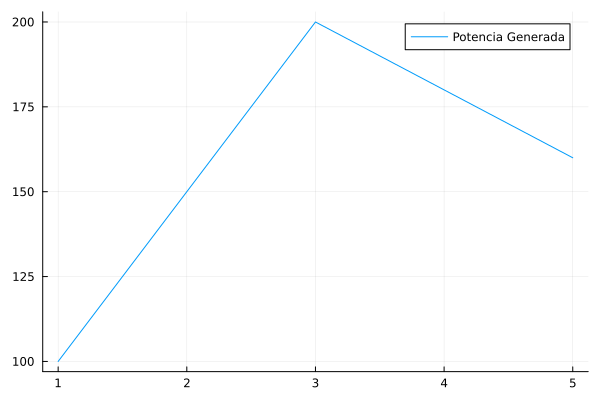

In [6]:
using Plots
x = 1:5
y = [100, 150, 200, 180, 160]
plot(x, y, label="Potencia Generada")

### Gráficos de Dispersión

Útiles para comparar valores discretos, como potencias generadas vs. cargas.

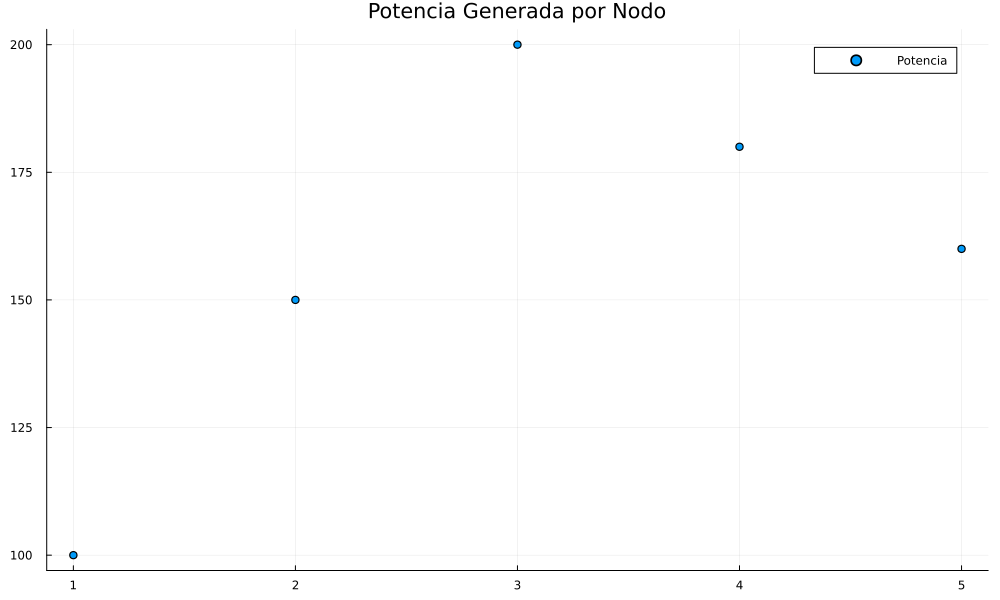

In [7]:
scatter(x, y, label="Potencia", title="Potencia Generada por Nodo", size = (1000, 600))

### Gráficos de Barras

Perfectos para comparar magnitudes, como costos por nodo.

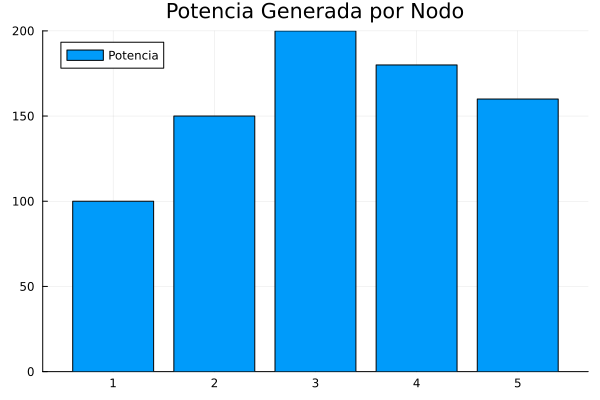

In [8]:
bar(x, y, label="Potencia", title="Potencia Generada por Nodo")

#### Mapas de calor

Son utiles para ver como se distribuyen las potencias por las lineas de alta tensión.

In [9]:
using DataFrames
using SparseArrays

# Creando los datos de ejemplo para el mapa de calor
line_flows = DataFrame(
    FROM = [1, 1, 2, 3, 4, 5, 2, 3, 4],
    TO = [2, 3, 4, 5, 5, 6, 1, 1, 3],
    FLOW = [150.2, 80.5, 120.8, 95.1, 180.3, 60.7, 110.5, 75.2, 90.1]
)

num_nodes = maximum(vcat(line_flows.FROM, line_flows.TO))
adjacency_flow = spzeros(num_nodes, num_nodes)

for row in eachrow(line_flows)
    i = row.FROM
    j = row.TO
    flow = row.FLOW
    adjacency_flow[i, j] += flow
    adjacency_flow[j, i] -= flow # Si el flujo es bidireccional o quieres ver la conexión
end

println(adjacency_flow)

sparse([2, 3, 1, 4, 1, 4, 5, 2, 3, 5, 3, 4, 6, 5], [1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6], [-39.69999999999999, -5.299999999999997, 39.69999999999999, -120.8, 5.299999999999997, 90.1, -95.1, 120.8, -90.1, -180.3, 95.1, 180.3, -60.7, 60.7], 6, 6)


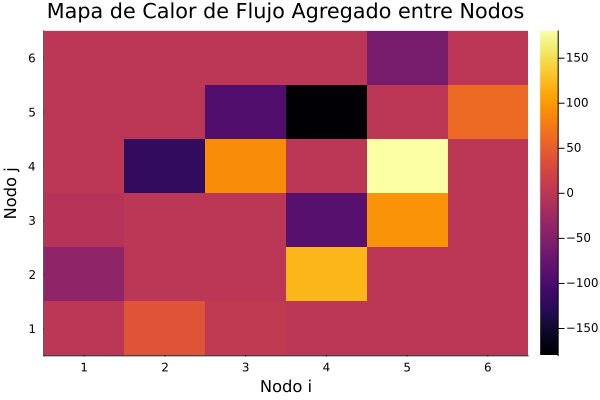

In [10]:
heatmap(adjacency_flow,
        xlabel = "Nodo i",
        ylabel = "Nodo j",
        title = "Mapa de Calor de Flujo Agregado entre Nodos")